In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

### Загрузим уже обработанные в прошлом ДЗ данные!

In [43]:
df = pd.read_csv('processed_sigma.csv')
df = df.drop("Trip_ID", axis=1)

# Определим признаки и целевую переменную
X = df.drop("Surge_Pricing_Type", axis=1)
y = df["Surge_Pricing_Type"]

# Задание 2
### Principal component analysis (PCA)

Спроецируйте данные на двумерную плоскость, используя `PCA`. Другими словами, выделите первые две главные компоненты и изобразите данные в осях этих компонент. Не забудьте центрировать признаки перед применением метода. 

**Какую долю изначальной дисперсии (информации) содержат/объясняют в себе обе компоненты?** Для этого воспользуйтесь атрибутом `explained_variance_ratio_` у PCA-класса.

In [3]:
X.head()

,Trip_Distance,Customer_Since_Months,Life_Style_Index,Customer_Rating,Cancellation_Last_1Month,Var1,Var2,Var3,Type_of_Cab_B,Type_of_Cab_C,...,Destination_Type_F,Destination_Type_G,Destination_Type_H,Destination_Type_I,Destination_Type_J,Destination_Type_K,Destination_Type_L,Destination_Type_M,Destination_Type_N,Gender_Male
0,6.77,1.0,2.42769,3.90500,0,40.0,46,60,1,0,...,0,0,0,0,0,0,0,0,0,0
1,29.47,10.0,2.78245,3.45000,0,38.0,56,78,1,0,...,0,0,0,0,0,0,0,0,0,1
2,41.58,10.0,2.79805,3.50125,2,61.0,56,77,1,0,...,0,0,0,0,0,0,0,0,0,1
3,61.56,10.0,2.79805,3.45375,0,61.0,52,74,0,1,...,0,0,0,0,0,0,0,0,0,1
4,54.95,10.0,3.03453,3.40250,4,51.0,49,102,0,1,...,0,0,0,0,0,0,0,0,0,1


In [4]:
### Центрируем данные
X_centered = X - X.mean()
X_centered.head()

,Trip_Distance,Customer_Since_Months,Life_Style_Index,Customer_Rating,Cancellation_Last_1Month,Var1,Var2,Var3,Type_of_Cab_B,Type_of_Cab_C,...,Destination_Type_F,Destination_Type_G,Destination_Type_H,Destination_Type_I,Destination_Type_J,Destination_Type_K,Destination_Type_L,Destination_Type_M,Destination_Type_N,Gender_Male
0,-37.430909,-5.015912,-0.373758,1.055542,-0.782838,-22.474883,-5.2028,-15.099019,0.610017,-0.213592,...,-0.014811,-0.011309,-0.00957,-0.006175,-0.005279,-0.005165,-0.004884,-0.000706,-0.000744,-0.71319
1,-14.730909,3.984088,-0.018998,0.600542,-0.782838,-24.474883,4.7972,2.900981,0.610017,-0.213592,...,-0.014811,-0.011309,-0.00957,-0.006175,-0.005279,-0.005165,-0.004884,-0.000706,-0.000744,0.28681
2,-2.620909,3.984088,-0.003398,0.651792,1.217162,-1.474883,4.7972,1.900981,0.610017,-0.213592,...,-0.014811,-0.011309,-0.00957,-0.006175,-0.005279,-0.005165,-0.004884,-0.000706,-0.000744,0.28681
3,17.359091,3.984088,-0.003398,0.604292,-0.782838,-1.474883,0.7972,-1.099019,-0.389983,0.786408,...,-0.014811,-0.011309,-0.00957,-0.006175,-0.005279,-0.005165,-0.004884,-0.000706,-0.000744,0.28681
4,10.749091,3.984088,0.233082,0.553042,3.217162,-11.474883,-2.2028,26.900981,-0.389983,0.786408,...,-0.014811,-0.011309,-0.00957,-0.006175,-0.005279,-0.005165,-0.004884,-0.000706,-0.000744,0.28681


In [5]:
# Проверка
X_centered.sum()

Trip_Distance                    3.107061e-10
Customer_Since_Months           -9.780621e-12
Life_Style_Index                -7.218226e-11
Customer_Rating                  1.475797e-11
Cancellation_Last_1Month         1.279066e-11
Var1                             1.982130e-10
Var2                            -3.268212e-10
Var3                             6.160690e-10
Type_of_Cab_B                    4.130030e-13
Type_of_Cab_C                    6.195044e-13
Type_of_Cab_D                   -1.147527e-12
Type_of_Cab_E                    4.254375e-13
Confidence_Life_Style_Index_B   -4.088285e-12
Confidence_Life_Style_Index_C   -8.597567e-13
Destination_Type_B              -1.025846e-12
Destination_Type_C              -3.014478e-12
Destination_Type_D              -2.078338e-13
Destination_Type_E               1.273648e-12
Destination_Type_F               3.705924e-13
Destination_Type_G              -6.710188e-13
Destination_Type_H              -5.373479e-14
Destination_Type_I              -1

Близко к нулю, значит успешно центрировали.

In [6]:
from sklearn.decomposition import PCA

# Создание экземпляра PCA с двумя компонентами
pca = PCA(n_components=2)

# Применение PCA к набору данных и преобразование его в низкоразмерное представление
PCA_dataset = pca.fit_transform(X_centered)

# Конвертация полученного массива NumPy в объект pandas DataFrame с двумя столбцами 'PCA_1' и 'PCA_2'
PCA_dataset = pd.DataFrame(PCA_dataset, columns=['PCA_1', 'PCA_2'])

# Вывод на экран первых нескольких строк преобразованного набора данных
PCA_dataset.head()


,PCA_1,PCA_2
0,-38.743132,-23.282634
1,-13.209252,-25.023815
2,-2.004910,-1.637085
3,17.178458,-0.907657
4,14.477389,-11.656752


In [7]:
pca.explained_variance_ratio_

array([0.63176117, 0.21129863])

In [8]:
# Получение долей объясненной дисперсии для каждой компоненты
explained_variance_ratio = pca.explained_variance_ratio_

# Вывод на экран доли объясненной дисперсии для каждой компоненты
print("Explained variance ratio for PCA_1:", explained_variance_ratio[0])
print("Explained variance ratio for PCA_2:", explained_variance_ratio[1])

# Вычисление общей доли объясненной дисперсии
total_explained_variance = explained_variance_ratio.sum()

# Вывод на экран общей доли объясненной дисперсии
print("Total explained variance by both components:", total_explained_variance)


Explained variance ratio for PCA_1: 0.6317611736644301
Explained variance ratio for PCA_2: 0.21129862994557483
Total explained variance by both components: 0.8430598036100049


# Задание 3
Изобразите heatmap корреляции изначальных признаков с новыми двумя главными компонентами. \
**Какие признаки коррелируют с первой компонентой? Какие со второй? В качестве порогового значения договоримся о корреляции >= 0.5 по абсолютному значению **


In [9]:
# Вычисление корреляции между каждым из исходных признаков в наборе данных X и первой главной компонентой (PCA_1)
first_component_corr = X.corrwith(PCA_dataset.PCA_1)

# Вычисление корреляции между каждым из исходных признаков в наборе данных X и второй главной компонентой (PCA_2)
second_component_corr = X.corrwith(PCA_dataset.PCA_2)

# Объединение двух серий корреляции в один объект DataFrame, располагая их рядом друг с другом (axis=1)
corrs = pd.concat((first_component_corr, second_component_corr), axis=1)

# Присвоение имен столбцов 'PCA_1' и 'PCA_2' объединенному объекту DataFrame
corrs.columns = ['PCA_1', 'PCA_2']

# Вывод на экран объекта DataFrame, содержащего корреляции между исходными признаками и главными компонентами
corrs


,PCA_1,PCA_2
Trip_Distance,0.997767,0.018410
Customer_Since_Months,0.121591,0.003500
Life_Style_Index,0.480658,-0.025901
Customer_Rating,-0.070104,-0.003757
Cancellation_Last_1Month,0.000803,0.008960
Var1,-0.048532,0.998600
Var2,0.247178,-0.028448
Var3,0.293819,-0.026583
Type_of_Cab_B,-0.048751,0.005723
Type_of_Cab_C,-0.012059,-0.003397


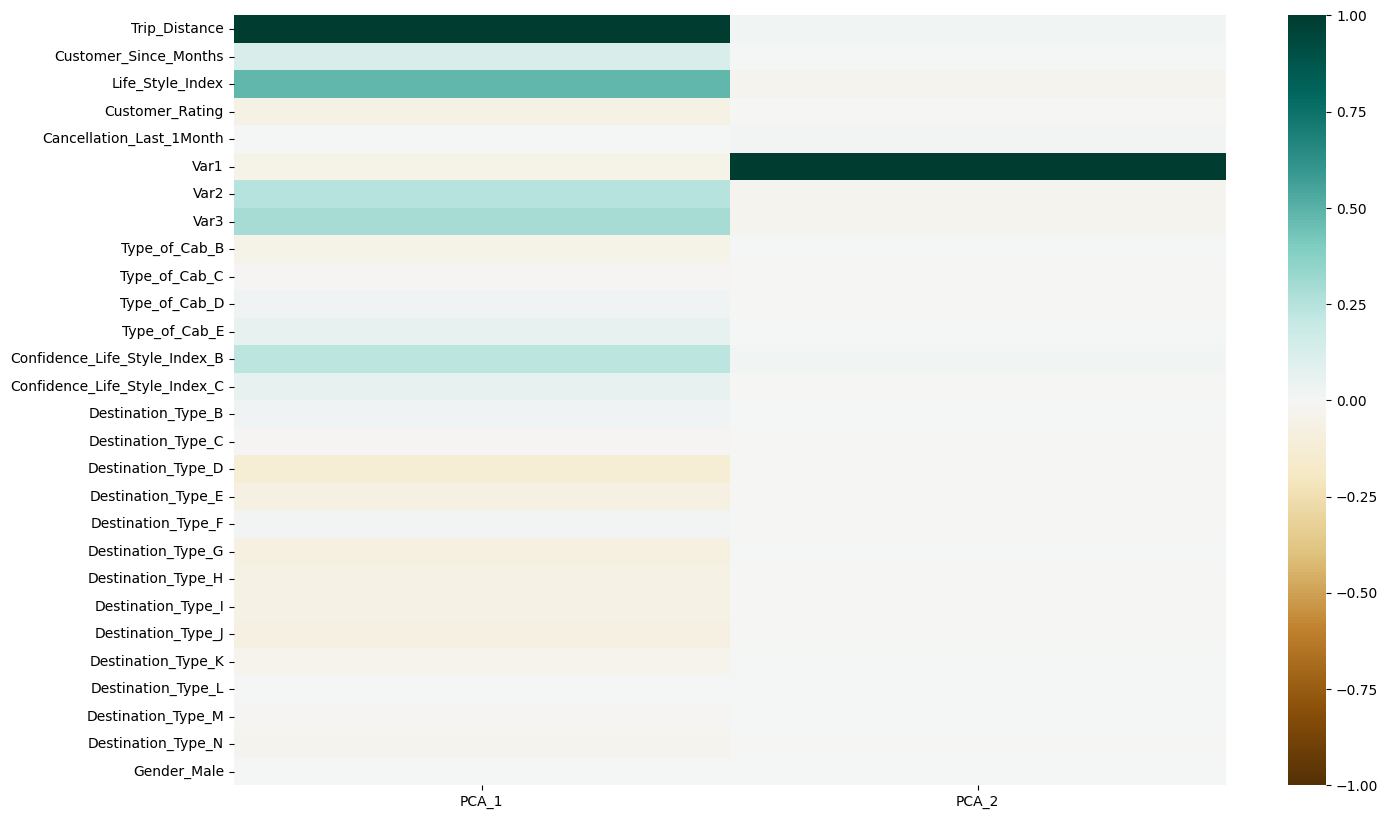

In [10]:
import seaborn as sns

fig = plt.figure()

fig.set_size_inches(16, 10)

sns.heatmap(corrs, 
            xticklabels=corrs.columns,
            yticklabels=corrs.index,
            cmap='BrBG',
            vmin=-1,
            vmax=1)

plt.show()

**Задание 3.** Изобразите двумерную проекцию данных с метками классов. Выделите третью главную компоненту и аналогично нарисуйте трехмерную проекцию с метками классов. \
**Какие признаки коррелируют с третьей компонентой?**

In [11]:
### Провернем все то же самое для 3 компонент!

pca_3d = PCA(n_components=3)
pca_3d.fit(X_centered)
PCA_dataset_3d = pca_3d.transform(X_centered)
PCA_dataset_3d = pd.DataFrame(PCA_dataset_3d, columns=['PCA_1', 'PCA_2', 'PCA_3'])

PCA_dataset_3d.head()

,PCA_1,PCA_2,PCA_3
0,-38.743132,-23.282634,-11.303274
1,-13.209252,-25.023815,5.664106
2,-2.004910,-1.637085,3.663032
3,17.178458,-0.907657,-3.191676
4,14.477389,-11.656752,22.999348


In [12]:
### Что содержится в новых признаках?

first_component_corr_3d = X.corrwith(PCA_dataset_3d.PCA_1)
second_component_corr_3d = X.corrwith(PCA_dataset_3d.PCA_2)
third_component_corr_3d = X.corrwith(PCA_dataset_3d.PCA_3)

corrs_3d = pd.concat((first_component_corr_3d, 
                      second_component_corr_3d, 
                      third_component_corr_3d), axis=1)

corrs_3d.columns = ['PCA_1', 'PCA_2', 'PCA_3']

corrs_3d

,PCA_1,PCA_2,PCA_3
Trip_Distance,0.997767,0.018410,-0.064176
Customer_Since_Months,0.121591,0.003500,0.081370
Life_Style_Index,0.480658,-0.025901,0.166688
Customer_Rating,-0.070104,-0.003757,-0.236793
Cancellation_Last_1Month,0.000803,0.008960,0.136222
Var1,-0.048532,0.998600,0.021003
Var2,0.247178,-0.028448,0.705159
Var3,0.293819,-0.026583,0.951081
Type_of_Cab_B,-0.048751,0.005723,0.011211
Type_of_Cab_C,-0.012059,-0.003397,-0.008707


Советуем еще и замерить попарные корреляции между главными компонентами! Это поможет в ответе на один из тестовых вопросов.

In [13]:
corr1 = np.corrcoef(PCA_dataset_3d.iloc[:, 1], PCA_dataset_3d.iloc[:, 2])
print(f"Корреляция между второй и третьей главными компонентами: {corr1[0, 1]}")


Корреляция между второй и третьей главными компонентами: -9.935700710338337e-16


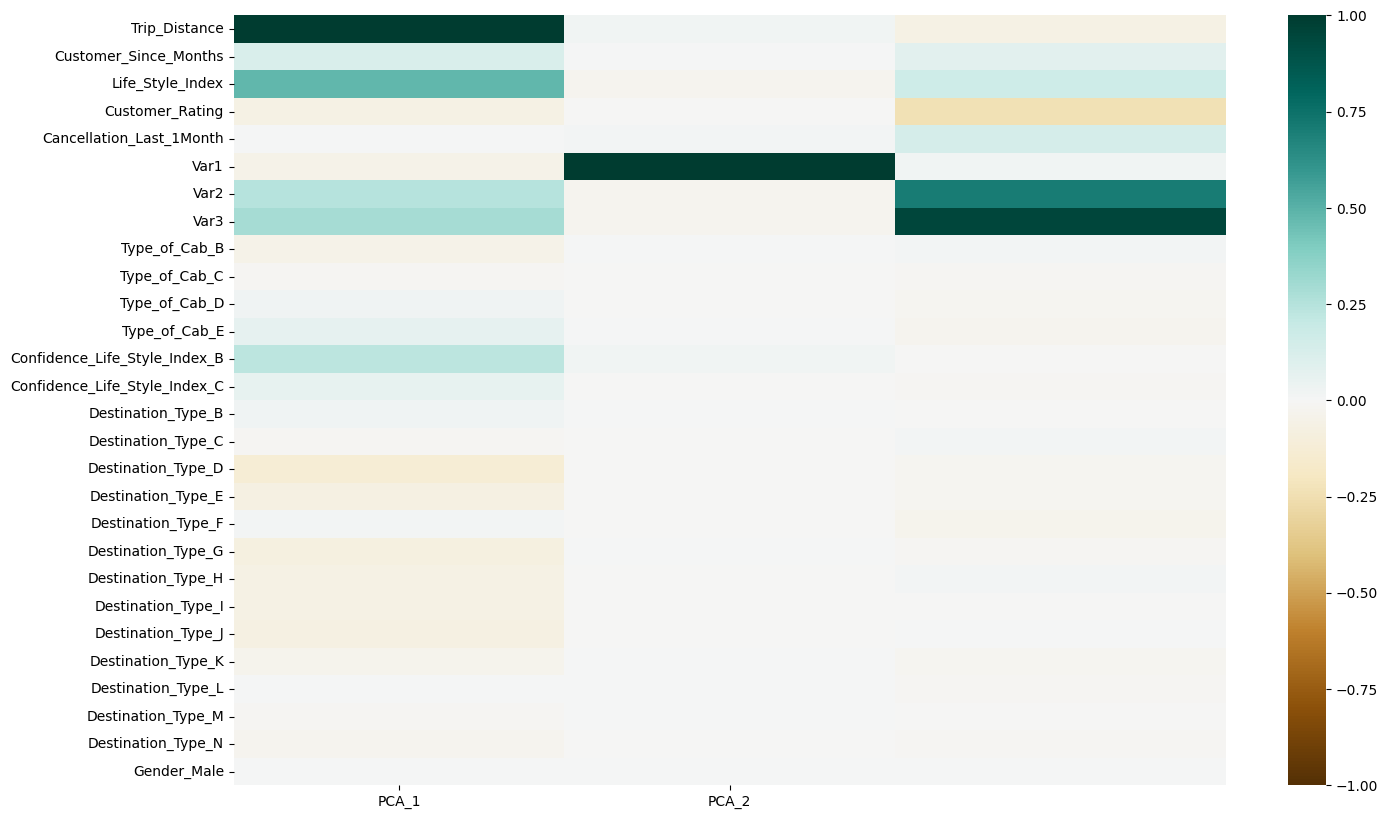

In [14]:
fig = plt.figure()

fig.set_size_inches(16, 10)

sns.heatmap(corrs_3d, 
            xticklabels=corrs.columns,
            yticklabels=corrs.index,
            cmap='BrBG',
            vmin=-1,
            vmax=1)

plt.show()

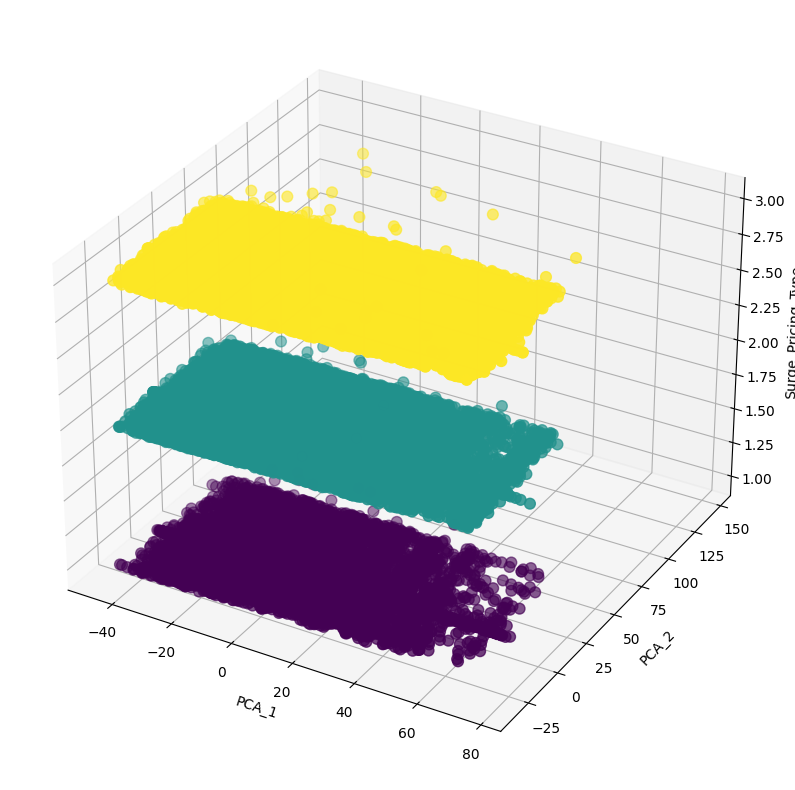

In [15]:
PCA_dataset_3d = np.concatenate((PCA_dataset.values, y.values.reshape(-1, 1)), axis=1)
PCA_dataset_3d = pd.DataFrame(PCA_dataset_3d, columns=['PCA_1', 'PCA_2', 'Surge_Pricing_Type'])

fig = plt.figure()
fig.set_size_inches(16, 10)
ax = fig.add_subplot(111, projection='3d')
ax.scatter(PCA_dataset_3d['PCA_1'], PCA_dataset_3d['PCA_2'], PCA_dataset_3d['Surge_Pricing_Type'],
           c=PCA_dataset_3d['Surge_Pricing_Type'], cmap="viridis", s=60)
ax.set_xlabel("PCA_1")
ax.set_ylabel("PCA_2")
ax.set_zlabel("Surge_Pricing_Type")
plt.show()


# Задание 5

Обучите логистическую регрессию на первых двух компонентах центрированных данных и подберите гиперпараметры. Обучите логистическую регрессию на центрированных данных и подберите гиперпараметры. **Сравните метрику accuracy и f1-score на тестовой выборке в двух моделях**.

P.S. для удобства, скорости и нормализации данных (понадобится, так как захотим повалидироваться на параметрах регуляризации) можно построить конструкцию Pipeline c 3 следующими степами: StandardScaler -> PCA -> LogisticRegression

In [18]:
np.random.seed(2022)
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report


# Разбиение набора данных на обучающий и тестовый наборы
X_train, X_test, y_train, y_test = train_test_split(X_centered, y, test_size=0.2, 
                                                    shuffle=True, random_state=2022)


В этом коде создается конвейер для предобработки данных и обучения модели логистической регрессии. Затем производится поиск по сетке гиперпараметров для оптимизации модели и вывод результатов классификации.

In [30]:
# Определение сетки гиперпараметров для модели логистической регрессии
param_grid = {'model__penalty': ['l1', 'l2', 'elasticnet'],
              'model__C': [1e-5, 0.0001, 0.001, 0.01]}

# Создание конвейера для предобработки данных и обучения модели
pipe = Pipeline([('scaler', StandardScaler()),  # Масштабирование данных
                ('pca', PCA(n_components=2)),  # Уменьшение размерности с использованием PCA
                ('model', LogisticRegression())])  # Модель логистической регрессии

# Обучение модели на тренировочных данных
pipe.fit(X_train, y_train)

# Вывод отчета о классификации для тестов
print(classification_report(y_test, pipe.predict(X_test), digits=3))

              precision    recall  f1-score   support

           1      0.000     0.000     0.000      5372
           2      0.477     0.677     0.560     11349
           3      0.485     0.517     0.500      9612

    accuracy                          0.480     26333
   macro avg      0.321     0.398     0.353     26333
weighted avg      0.383     0.480     0.424     26333



В этом коде используется GridSearchCV для оптимизации гиперпараметров конвейера с логистической регрессией. Затем выводятся лучшие найденные параметры и результаты классификации на тестовой выборке.

In [31]:
# Использование GridSearchCV для оптимизации гиперпараметров конвейера
search = GridSearchCV(pipe, param_grid)

# Обучение модели с использованием поиска по сетке гиперпараметров
search.fit(X_train, y_train)

# Вывод лучших найденных параметров и их оценки
print(f"Best parameter (CV score={search.best_score_:.5f}):")
print(search.best_params_)

# Вывод отчета о классификации для тестовой выборки с использованием лучших параметров
print(classification_report(y_test, search.predict(X_test), digits=3,))

Best parameter (CV score=0.48083):
{'model__C': 0.0001, 'model__penalty': 'l2'}
              precision    recall  f1-score   support

           1      0.000     0.000     0.000      5372
           2      0.478     0.689     0.564     11349
           3      0.492     0.509     0.500      9612

    accuracy                          0.483     26333
   macro avg      0.323     0.399     0.355     26333
weighted avg      0.385     0.483     0.426     26333



В этом коде устанавливаются лучшие найденные гиперпараметры для модели логистической регрессии в конвейере. Затем обучается модель с использованием этих параметров и выводится отчет о классификации на тестовой выборке.

In [22]:
# Установка лучших найденных гиперпараметров для модели логистической регрессии
pipe.set_params(model__C=0.0001)  # Замена параметра C на найденный оптимальный
pipe.set_params(model__penalty='l2')  # Установка оптимального значения параметра penalty (l2 используется по умолчанию)

# Обучение модели с использованием оптимальных гиперпараметров
pipe.fit(X_train, y_train)

# Вывод отчета о классификации для тестовой выборки с использованием оптимальных параметров
print(classification_report(y_test, pipe.predict(X_test), digits=3))


              precision    recall  f1-score   support

           1      0.000     0.000     0.000      5372
           2      0.478     0.675     0.560     11349
           3      0.485     0.520     0.502      9612

    accuracy                          0.481     26333
   macro avg      0.321     0.398     0.354     26333
weighted avg      0.383     0.481     0.424     26333



В этом коде создается новый конвейер с масштабированием данных и моделью логистической регрессии с оптимальными гиперпараметрами, найденными ранее. **Отсутствует уменьшение размерности с помощью PCA**. Затем обучается модель и выводится отчет о классификации на тестовой выборке.

In [23]:
# Создание нового конвейера с масштабированием данных и моделью логистической регрессии с оптимальными гиперпараметрами
pipe2 = Pipeline([('scaler', StandardScaler()),  # Масштабирование данных
                  ('model', LogisticRegression(C=0.001, penalty='l2'))])  # Модель логистической регрессии с оптимальными параметрами

# Обучение модели на тренировочных данных
pipe2.fit(X_train, y_train)

# Вывод отчета о классификации для тестовой выборки
print(classification_report(y_test, pipe2.predict(X_test), digits=3))

              precision    recall  f1-score   support

           1      0.746     0.532     0.621      5372
           2      0.636     0.830     0.720     11349
           3      0.736     0.589     0.655      9612

    accuracy                          0.681     26333
   macro avg      0.706     0.650     0.665     26333
weighted avg      0.695     0.681     0.676     26333



Кажется, достаточно сильно теряем в качестве! Может, добавить компонент?

# Задание 6

Обучите модели логистической регресии на нескольких различных компонентах: [2, 4, 8, 16, 28]. **Нарисуйте графики зависимости accuracy, f1-score от количества компонент. Введите их значения через запятую**. При обучении используйте l2-регуляризацию, гиперпараметр C подбирайте по сетке. 


В этом коде определена функция `train_pca_i`, которая принимает число компонент для уменьшения размерности с использованием PCA и обучающие данные. Функция создает конвейер с масштабированием данных, PCA и моделью логистической регрессии с указанными параметрами. Затем выполняется поиск по сетке гиперпараметров, обучение модели и вычисление метрик точности и взвешенной средней F1-меры.

In [34]:
### Чтобы не заставлять вас писать похожий на предыдущий код,
### Написали функцию, которая будет обучать модель для
### произвольного числа n_components главных компонент.

def train_pca_i(n_components, X_train, y_train):
    
    # Создание конвейера с масштабированием данных, уменьшением размерности с использованием PCA и моделью логистической регрессии
    pipe = Pipeline([('scaler', StandardScaler()),  # Масштабирование данных
                     ('pca', PCA(n_components=n_components)),  # Уменьшение размерности с использованием PCA
                     ('model', LogisticRegression(penalty='l2', solver='saga', random_state=1))])  # Модель логистической регрессии с заданными гиперпараметрами

    # Определение сетки гиперпараметров для модели логистической регрессии
    param_grid = {'model__C': [0.0001, 0.001, 0.01, 0.1]}
    
    # Использование GridSearchCV для оптимизации гиперпараметров конвейера
    grid = GridSearchCV(pipe, param_grid, cv=5, n_jobs=-1)
    grid.fit(X_train, y_train)

    # Получение отчета о классификации для тестовой выборки с использованием лучших параметров
    report = classification_report(y_test, grid.predict(X_test), output_dict=True)

    # Возвращение точности и средневзвешенного F1-счета классификации на тестовой выборке
    return (report['accuracy'],
            report['weighted avg']['f1-score'])


In [35]:
train_pca_i(2, X_train, y_train)

(0.4834238408081115, 0.4261318137308015)

В этом коде вычисляется точность и средневзвешенный F1-счет для различных значений `n_components` (количество главных компонент PCA) с использованием функции `train_pca_i`. Результаты сохраняются в двух словарях `accuracy_dict` и `f1_score_dict`.

In [36]:
%%time
accuracy_dict, f1_score_dict = {}, {}
components_list = [2, 4, 8, 16, 28]

# Вычисление точности и средневзвешенного F1-счета для различных значений n_components с использованием функции train_pca_i
for n_components in components_list:
    accuracy, f1_score = train_pca_i(n_components, X_train, y_train)
    accuracy_dict[n_components] = accuracy
    f1_score_dict[n_components] = f1_score


CPU times: total: 6.86 s
Wall time: 14.2 s


В этом коде строятся два графика, один для точности и один для средневзвешенного F1-счета, для различных значений `n_components`. Затем объединяем эти два графика в одном для сравнения.

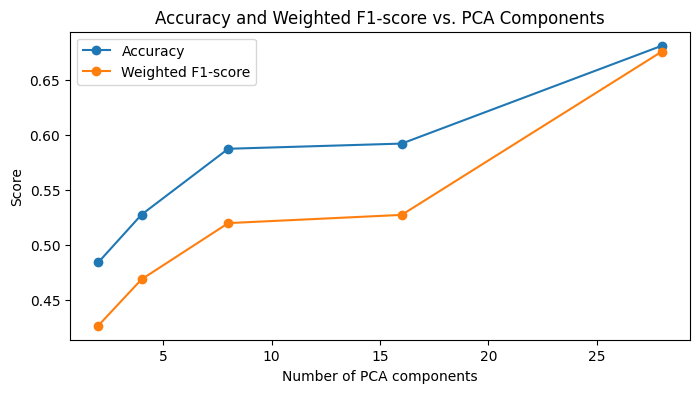

In [37]:
import matplotlib.pyplot as plt

# Строим графики точности и средневзвешенного F1-счета
fig, ax = plt.subplots()
fig.set_size_inches(8, 4)

# График точности
ax.plot(list(accuracy_dict.keys()), list(accuracy_dict.values()), label="Accuracy", marker="o")

# График средневзвешенного F1-счета
ax.plot(list(f1_score_dict.keys()), list(f1_score_dict.values()), label="Weighted F1-score", marker="o")

# Устанавливаем подписи осей и заголовок
ax.set_xlabel("Number of PCA components")
ax.set_ylabel("Score")
ax.set_title("Accuracy and Weighted F1-score vs. PCA Components")

# Выводим легенду
ax.legend()

# Отображаем график
plt.show()


In [39]:
f1_score_dict[28]

0.6760757307801638

Обычно, когда решается какая-то высокоразмерная предсказательная задача, где тысячи признаков, функция качества PCA моделей похожа на параболу ветвями вниз в зависимости от количества компонент (для совсем маленьких и больших n_component качество маленькое, при этом есть где-то промежуточное значение).

Как думаете, почему здесь у нас непрерывно растущие графики качества?

Может, изначальные признаки были слишком хороши?

В данном случае, непрерывно растущие графики качества могут быть связаны с несколькими причинами:

1. **Низкая размерность данных:** Если исходные данные имеют относительно небольшую размерность (менее тысячи признаков, как упоминалось в вашем вопросе), то потеря информации при уменьшении размерности с помощью PCA может быть незначительной. В этом случае, при увеличении числа компонент модель будет лучше улавливать всю доступную информацию, и качество будет расти.
    
2. **Хорошая разделимость данных:** Если исходные данные уже хорошо разделимы в пространстве признаков, то даже при небольшом количестве компонент PCA модель может показывать хорошее качество предсказания. В таких случаях, добавление дополнительных компонент может продолжать улучшать качество, так как модель использует всё больше доступной информации для разделения классов. Это может быть связано с тем, что данные уже хорошо подготовлены или предобработаны.

3. **Корреляция между признаками:** Если исходные признаки сильно коррелированы друг с другом, то PCA может помочь уменьшить влияние этой корреляции, выделяя наиболее важные направления в данных. В таком случае, увеличение количества компонент будет улучшать качество модели, поскольку она будет использовать дополнительные некоррелированные направления для предсказания.

Однако стоит отметить, что непрерывное увеличение качества модели при увеличении числа компонент PCA может привести к переобучению.

PCA (Principal Component Analysis, или метод главных компонент) - это статистический метод, используемый для уменьшения размерности данных, сохраняя при этом наиболее важную информацию. PCA работает путем преобразования исходных признаков в новый набор ортогональных признаков, называемых главными компонентами.

# t-SNE

Напомним, что метод заключается в введении некоторых функций, основанных на расстоянии между признаками, которые измеряют близость объектов. Функций, как вы помните, две, и они заданы в исходном и новом пространствах соотвественно. Далее минимизируем дивергенцию Кульбака-Лейблера по координатaм в новом пространстве

Основная идея метода главных компонент заключается в: **Нахождении m новых признаков, которые линейно выражаются через исходные.**

Обучите t-sne c `n_components=2` на изначальных данных и визуализируйте результаты с учетом известных классов. 

P.S. если устанете ждать обучения TSNE, или упадет ошибка по типу oom, то можно сократить число объектов в датасете до, например, пары тысяч. Это и следующее задания никак проверяться системой не будут. Вам достаточно повторить упражнение с практики и получить какое-то более адекватное (по сравнению с PCA) изображение классов.

In [3]:
import pandas as pd
import numpy as np

df1 = pd.read_excel('processed_segmentation.xlsx')

In [4]:
from sklearn.manifold import TSNE


X = df1.drop('Segmentation', axis=1)
Y = df1['Segmentation']

X_tsne = TSNE(n_components=2).fit_transform(X)

X_tsne.shape

(8068, 2)

In [5]:
### Преобразуем в pd.DataFrame

X_tsne = np.concatenate((X_tsne, Y.values.reshape(-1, 1)),
                               axis=1)

X_tsne = pd.DataFrame(X_tsne, columns=['Tsne_1st_component',
                                       'Tsne_2nd_component',
                                       'SEGMENT'])

<Axes: xlabel='Tsne_1st_component', ylabel='Tsne_2nd_component'>

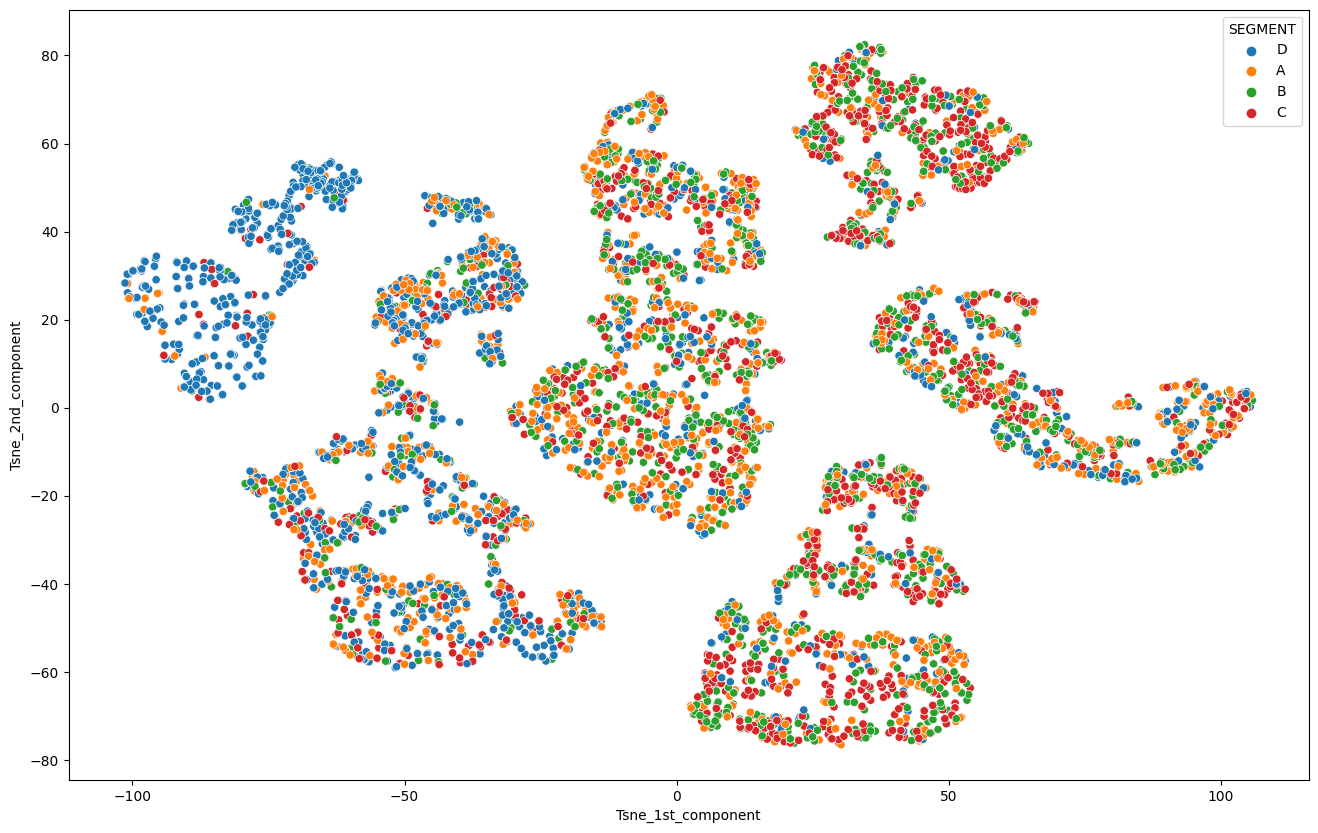

In [7]:
import seaborn as sns
import matplotlib.pyplot as plt

fig = plt.figure()
fig.set_size_inches(16, 10)
    
sns.scatterplot(data=X_tsne, x="Tsne_1st_component", 
                y="Tsne_2nd_component", 
                hue="SEGMENT")

**Задание 7.** Обучите t-sne с `n_components=3` на изначальных данных и визуализируйте результаты с учетом известных классов.

In [8]:
### Произведем T-SNE преобразование 3D

from sklearn.manifold import TSNE

X_tsne_3d = TSNE(n_components=3).fit_transform(X)

X_tsne_3d

array([[-25.46123   ,  -0.45469943,  -3.7814689 ],
       [ -2.3403792 ,   1.8377805 , -13.106708  ],
       [ 14.919323  ,  -3.7799084 , -17.127354  ],
       ...,
       [ -4.038925  , -13.010371  ,   9.23412   ],
       [-14.795416  , -10.417341  ,   0.11272546],
       [ -8.023073  ,  -3.6614203 , -16.906582  ]], dtype=float32)

In [9]:
### Преобразуем в pd.DataFrame

X_tsne_3d = np.concatenate((X_tsne_3d, Y.values.reshape(-1, 1)),
                               axis=1)

X_tsne_3d = pd.DataFrame(X_tsne_3d, columns=['Tsne_1st_component',
                                             'Tsne_2nd_component',
                                             'Tsne_3rd_component',
                                             'SEGMENT'])

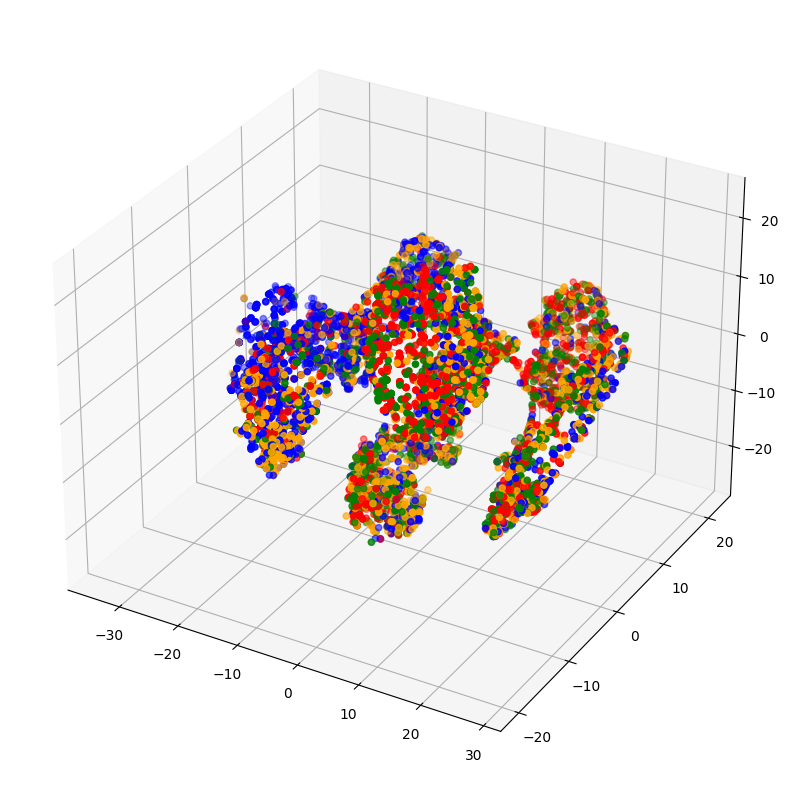

In [10]:
fig = plt.figure()
fig.set_size_inches(16, 10)

ax = plt.axes(projection='3d')

colors = X_tsne_3d['SEGMENT'].replace(['A', 'B', 'C', 'D'],
                                      ['orange', 'green', 'red', 'blue'])

ax.scatter3D(X_tsne_3d['Tsne_1st_component'], 
             X_tsne_3d['Tsne_2nd_component'],
             X_tsne_3d['Tsne_3rd_component'], 
             c=colors)

In [12]:
import datetime
import pandas as pd
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.multiclass import OneVsRestClassifier
from sklearn.linear_model import SGDClassifier

# Засекаем начальное время
begin_time = datetime.datetime.now()

# Создаем конвейер с масштабированием данных и классификатором OneVsRest с использованием SGDClassifier
pipe = Pipeline([('scaler', StandardScaler()), 
                 ('one_vs_all', OneVsRestClassifier(SGDClassifier()))])

# Подготавливаем данные
X = X_tsne_3d.drop('SEGMENT', axis=1)
Y = X_tsne_3d['SEGMENT']

# Обучаем конвейер на данных
pipe.fit(X, Y)

# Рассчитываем время обучения
elapsed_time = datetime.datetime.now() - begin_time

# Выводим время обучения и оценку качества модели на данных
print(f"Training time: {elapsed_time}")
print(f"Model score: {pipe.score(X, Y)}")


Training time: 0:00:00.043000
Model score: 0.3600644521566683


Советуем обрезать датасет до маленького числа объектов (чтобы точки и их группки были хорошо различимы) и поиграться с гиперпараметрами класса Tsne! Обычно такая "игра" может привести к куда более красивым результатам по сравнению с теми, что получены с дефолтными настройками!